In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def rand_weather(n:int = 100, ini_state:list = [0.5,0.5]):
    
    x = np.random.rand(int(n))
    weather = 0 #初期の天気. 晴天を0, 雨天を1とする
    weather_list = []
    sum = 0
    avg_list = []
    
    for i, n in enumerate(tqdm(x)):
        weather_state = [0,0]
        
        for j, wi in enumerate(ini_state):
            if i == 0:
                weather = j
            if weather <= 0.5 and 0 <= n < 0.75:
                weather_state[j] = 0*wi
            elif weather <= 0.5 and 0.75 <= n <= 1:
                weather_state[j] = 1*wi
            elif weather > 0.5 and  0 <= n < 0.25:
                weather_state[j] = 0*wi
            else:
                weather_state[j] = 1*wi
        
        weather = np.sum(weather_state)
        weather_list.append(weather)
        sum += weather
        avg_list.append(sum/(i+1))
    
    return weather_list, avg_list

100%|██████████| 50000/50000 [00:01<00:00, 40993.56it/s]


0.50559


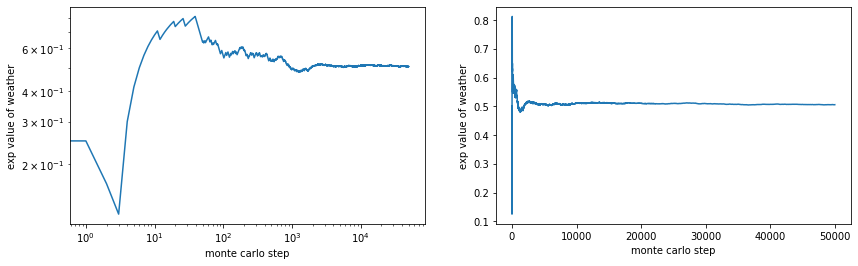

In [16]:
weather_list, avg_list = rand_weather(n=5*10e3, ini_state=[0.5,0.5])
print(avg_list[-1])

fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].set(xscale="log", yscale="log")
axs[1].set(xscale="linear", yscale="linear")
axs[0].set_xlabel("monte carlo step")
axs[0].set_ylabel("exp value of weather")
axs[1].set_xlabel("monte carlo step")
axs[1].set_ylabel("exp value of weather")
axs[0].plot(avg_list, label="weather")
axs[1].plot(avg_list, label="weather")
plt.show()